## 라이브러리 선언 및 데이터 불러오기

In [3]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 라이브러리
from sklearn import tree
from sklearn import ensemble

In [4]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

# A. 데이터 전처리

### A-1. 타입통합 / 특성 숫자컬럼 추가

In [5]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [6]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [7]:
#데이터 타입 통합
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [8]:
# 특성값 숫자컬럼 변경

### NP.WHERE를 쓰는거는 가장 간단하게 데이터를 변환
NP.where 활용포인트 : 변환대상이 적을경우!
변환대상이 5개정 될 경우에는 MAP함수를 써보는 것도 괜찮다.
딕셔너리는 { 대괄호를 쓰고 중간에 KEY값과 VALUE값을 쓰고 사이에 : 를 넣는다)

##카테고리가 4-5RO
np.where(featuresData.PROMOTIO=="Y",10,
         np.where(featuresData.PROMOTION=="N',9,
                  np.where(featuresData.PROMOTION=="N',9)

In [9]:
def ynLabelFunc(inValue):
    if inValue == "Y":
        outValue = 1
    else:
        outValue = 0
    return outValue

In [10]:
ynMap = {"Y":1, "N":2}

In [11]:
ynMap["N"]

2

In [12]:
featuresData["HOLIDAY_YNMAP"] = featuresData.HOLIDAY.map(ynMap)  ##NP.WHERE를 사용하는 대신 MAP을 사용한다.

In [13]:
#변환대상이 100개 된다?(labelencode)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
ynLabelEn = LabelEncoder()

In [16]:
ynLabelEn.fit_transform(featuresData["HOLIDAY"])

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [18]:
featuresData.drop_duplicates()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YNMAP
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,2
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,2
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,2
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,2
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,2


In [19]:
csData = pd.read_csv("../dataset/customerdata.csv")
csData

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,A13566,4273.900000,3,6,1.679181,Big-Screen-lover
1,A14219,3642.441950,2,4,2.682023,Sleeping-dog
2,A15312,3653.884565,2,5,3.208202,Sleeping-dog
3,A16605,3713.211107,2,6,0.900000,Early-bird
4,B10634,3391.074215,2,4,2.453656,Sleeping-dog
...,...,...,...,...,...,...
145,Z13253,3678.800000,2,5,2.463670,Big-Screen-lover
146,Z13534,3662.437527,3,6,0.900000,Early-bird
147,Z16428,3516.500000,2,5,2.371301,Big-Screen-lover
148,Z16735,3300.100000,2,5,1.704942,Big-Screen-lover


In [20]:
csData["CUSTID"] = ynLabelEn.fit_transform(csData["CUSTID"])  ## 1. custtype의 갯수를 확인하고 2.오름차순으로 정렬한 후에 3.숫자로 변경해줌.

In [21]:
csData

,CUSTID,AVGPRICE,EMI,DEVICECOUNT,PRODUCTAGE,CUSTTYPE
0,0,4273.900000,3,6,1.679181,Big-Screen-lover
1,1,3642.441950,2,4,2.682023,Sleeping-dog
2,2,3653.884565,2,5,3.208202,Sleeping-dog
3,3,3713.211107,2,6,0.900000,Early-bird
4,4,3391.074215,2,4,2.453656,Sleeping-dog
...,...,...,...,...,...,...
145,145,3678.800000,2,5,2.463670,Big-Screen-lover
146,146,3662.437527,3,6,0.900000,Early-bird
147,147,3516.500000,2,5,2.371301,Big-Screen-lover
148,148,3300.100000,2,5,1.704942,Big-Screen-lover


In [22]:
ynLabelEn.inverse_transform(csData["CUSTID"])

array(['A13566', 'A14219', 'A15312', 'A16605', 'B10634', 'B16849',
       'B18816', 'C10639', 'C12717', 'C15050', 'C18306', 'C18622',
       'C19178', 'D11795', 'D13030', 'D15289', 'D17241', 'D17880',
       'E10778', 'E11917', 'E16075', 'E16221', 'E18145', 'E19404',
       'F10222', 'F12979', 'F14866', 'F17131', 'F18646', 'F19938',
       'G11453', 'G15439', 'G15736', 'G16437', 'G16681', 'G16922',
       'G18402', 'G19717', 'H10188', 'H15023', 'H16326', 'H16434',
       'H18821', 'H19829', 'I11601', 'I12899', 'I14835', 'I17056',
       'I17780', 'I18190', 'I19586', 'J10809', 'J15083', 'J16445',
       'J18368', 'J18640', 'K10712', 'K13300', 'K16632', 'L10919',
       'L13892', 'L16344', 'L17101', 'L18000', 'M10156', 'M16452',
       'M17538', 'N13273', 'N14862', 'N15762', 'O10236', 'O12193',
       'O13037', 'O13586', 'O16407', 'O19630', 'P14445', 'P14740',
       'P18446', 'P18769', 'P19679', 'Q11876', 'Q12581', 'Q13484',
       'Q14673', 'Q15445', 'Q16449', 'Q16970', 'Q18064', 'Q189

In [23]:
featuresData.head(1)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_YNMAP
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1


In [ ]:
# 숫자가 아니라 문자를 머신러닝에 던지면 에러가 발생함.(변경 Y=1 , N=0)
featuresData["PROMOTION_LB"] = np.where(featuresData.PROMOTION =="Y",1,0)
featuresData["HOLIDAY_LB"] = np.where(featuresData.HOLIDAY =="Y",1,0)

In [ ]:
# 검증
featuresData.loc[(featuresData.PROMOTION_LB == 1) &
                 (featuresData.PROMOTION == "Y") ] 

## A-2 특성 선정 / 데이터 분리

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns #만약 오류가 안되면 pip uninstall scipy 하고 pip install scipy 하면 됌(scipy는 통계를 담당하는 라이브러리임)
%matplotlib inline  ## 

UsageError: unrecognized arguments: ##


In [ ]:
sns.distplot(featuresData["QTY"]) #distplot = 변수하나에 대한 분포도

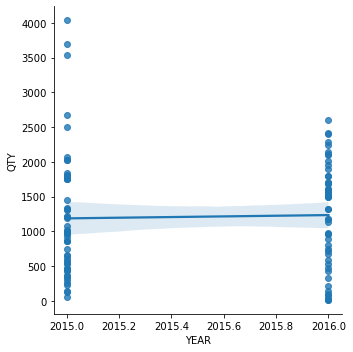

In [25]:
sns.lmplot(data = featuresData, x = "YEAR", y = "QTY") # 상관계수를 나타낸다.  HCLUS : 블랙프라이데이와 같은 큰 휴일은 0으로 지정해놨음.
plt.show()

In [26]:
stdCorrRepeat = np.array( list( range(3,8,1) ) ) / 10  ##0.3~0.8의 상관계수가 0.1씩 증가한다.

In [27]:
stdCorrRepeat

array([0.3, 0.4, 0.5, 0.6, 0.7])

# 머신러닝과 딥러닝의 차이
# 딥러닝은 재료를 모두 쓰고 너가 알아서 필요한 자료 선택해, 머신러닝은 상관계수를 도출하고 feature을 설정

In [ ]:
# 특성 선정
corrDf = featuresData.corr() #판매량에 영향을 주는 요소들이 어떤거인지 알 수 있음. #보통 0.3~0.7 은 상관관계가 있고, 0.7이상은 뚜렷한 상관관계를 띄고있다.
stdCorr = 0.3

In [ ]:
corrDf

In [ ]:
qtyCorr = corrDf.loc[["QTY"] ]
qtyCorr

In [ ]:
qtyCorr = corrDf.loc[:,["QTY"] ].sort_values(by=["QTY"],ascending=False) #내림차순 false 오름차순 true
qtyCorr

In [ ]:
sns.heatmap( qtyCorr, annot = True )
#각각의 지표에 대해서 직접 숫자를 나타내줌. sort를 해주면 기존의 입력되어있는 순서로 보여주는데 숫자가 큰수로 정렬되어 더 명확하게 볼수 있음.

In [ ]:
# stepwise
# 점진 선택법...

In [ ]:
features = list( corrDf.loc[ (abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1) ].index ) ##나자신인 qty는 답안지 이기 때문에 제외시켜줘야한다.인덱스는 숫자 문자 둘다 가능함.

In [ ]:
features

In [ ]:
label = ["QTY"]

In [3]:
# 데이터 분리(7:3)

In [4]:
stdRatio = 0.7

In [5]:
featuresData.shape

NameError: name 'featuresData' is not defined

In [6]:
# 원래는 시간의 순으로 데이터를 7대3으로 나누나 시간이 없는 데이터도 있을수 있기 때문에 무작위(랜덤)로 뽑아서 7대3 데이터를 나눈다.

### 1.랜덤 데이터분리(training data / test data)

In [7]:
from sklearn.model_selection import train_test_split

ImportError: DLL load failed while importing _arpack: 지정된 프로시저를 찾을 수 없습니다.

In [ ]:
traininDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel = train_test_split(featuresData.loc[:,features],
                                 featuresData.loc[:,label], 
                                 test_size=0.2, 
                                 random_state = 10) 
#계속돌릴때마다 값이 계속 달라진다 그래서 한번 추출한 데이터를 픽스하고 싶으면 random_state=10을 적어준다.
traininDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel 

In [8]:
print(trData.shape)
print(tdData.shape)
print(c.shape)
print(d.shape)

NameError: name 'trData' is not defined

## 2.시간순 데이터분리(training data / test data)

In [9]:
sortKey = ["YEARWEEK"]

In [10]:
sortedData =featuresData.sort_values(sortKey).reset_index(drop=True)
sortedData.YEARWEEK.describe()  # 예를 들어 2015년 데이터를 가지고 트레이닝데이터를 만들어보고 2016년데이터를 가지고 테스트해보자!

NameError: name 'featuresData' is not defined

In [11]:
stdYearweek = 2016

In [12]:
trainingDataFeatures = featuresData.loc[featuresData.YEAR < stdYearweek, features] #문제지
trainingDataLabel = featuresData.loc[featuresData.YEAR < stdYearweek, label] #정답
testDataFeatures = featuresData.loc[featuresData.YEAR >= stdYearweek, features] #문제지
testDataLabel = featuresData.loc[featuresData.YEAR >= stdYearweek, label] #정답

NameError: name 'featuresData' is not defined

In [13]:
stdIndex = int(featuresData.shape[0] * stdRatio)
stdIndex

NameError: name 'featuresData' is not defined

In [14]:
trainingDataFeatures = featuresData.loc[0:stdIndex, features] #문제지
trainingDataLabel = featuresData.loc[0:stdIndex, label] #정답
testDataFeatures = featuresData.loc[stdIndex+1 :, features] #문제지
testDataLabel = featuresData.loc[stdIndex+1 :, label] #정답

NameError: name 'featuresData' is not defined

In [15]:
print ( trainingDataFeatures.shape )
print ( trainingDataLabel.shape )
print ( testDataFeatures.shape )
print ( testDataLabel.shape )

NameError: name 'trainingDataFeatures' is not defined

## B 모델적용

### B-3. 모델적용

In [16]:
from sklearn import tree

ImportError: DLL load failed while importing _arpack: 지정된 프로시저를 찾을 수 없습니다.

In [ ]:
from sklearn.tree import plot_tree

In [17]:
import matplotlib.pyplot as plt

In [18]:
# 알고리즘을 고정시킴으로써 예측값을 재현 가능하게 해줌(random_state=10)
dtModel = tree.DecisionTreeRegressor(random_state=10)

NameError: name 'tree' is not defined

In [ ]:
dtModel.fit(X=trainingDataFeatures,
            y=trainingDataLabel) ## 대문자 X는 문제지, 소문자 y는 정답지)

In [ ]:
plt.figure(figsize=(13,8))
plot_tree(dtModel)

## C. 예측/검증

### c-4. 예측

In [19]:
testDataValueDt = dtModel.predict(testDataFeatures)

NameError: name 'dtModel' is not defined

In [20]:
dtModel

NameError: name 'dtModel' is not defined

In [21]:
predictValue = dtModel.predict( X = testDataFeatures ) ##테스트데이터(X)의 문제지를 대입하였을때 정답지(predictValue)를 추출한다.

NameError: name 'dtModel' is not defined

In [22]:
testDataValueDt = dtModel.predict(testDataFeatures)

NameError: name 'dtModel' is not defined

In [23]:
finalValue =testDataLabel

NameError: name 'testDataLabel' is not defined

In [24]:
finalValue

NameError: name 'finalValue' is not defined

In [25]:
len(predictValue) ##qty(31개)가 정답지로 추출된다.

NameError: name 'predictValue' is not defined

# 미래는 어떻게 예측할 것이냐?

In [26]:
features

NameError: name 'features' is not defined

In [27]:
inputHclus = 1 # 대휴일1 소휴일 :4
inputProPercent = 0.5 # 프로모션 비율
inputPromotionLb = 1 # 프로모션 적용 Y
inputHlb = 1 # 홀리데이 적용 Y

In [28]:
testData = pd.DataFrame( [ [inputHclus, inputProPercent, inputPromotionLb, inputHlb] ] )

In [29]:
dtModel.predict(testData)

NameError: name 'dtModel' is not defined